In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input and output directories
input_directory = "formatted_data"
output_directory = "cleaned_data"

# Create a folder for cleaned data
os.makedirs(output_directory, exist_ok=True)

# Function to detect and remove outliers using IQR
def remove_outliers(df, x_col, y_col):
    # Calculate Interquartile Range (IQR) for x and y columns
    Q1_x = df[x_col].quantile(0.25)
    Q3_x = df[x_col].quantile(0.75)
    IQR_x = Q3_x - Q1_x

    Q1_y = df[y_col].quantile(0.25)
    Q3_y = df[y_col].quantile(0.75)
    IQR_y = Q3_y - Q1_y

    # Define bounds for x and y
    lower_bound_x = Q1_x - 1.5 * IQR_x
    upper_bound_x = Q3_x + 1.5 * IQR_x

    lower_bound_y = Q1_y - 1.5 * IQR_y
    upper_bound_y = Q3_y + 1.5 * IQR_y

    # Filter data within the bounds
    filtered_df = df[(df[x_col] >= lower_bound_x) & (df[x_col] <= upper_bound_x) &
                     (df[y_col] >= lower_bound_y) & (df[y_col] <= upper_bound_y)]
    
    print(f"Data before filtering: {df.shape[0]} rows")
    print(f"Data after filtering: {filtered_df.shape[0]} rows")
    return filtered_df

# Process each file in the folder
for file_name in os.listdir(input_directory):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_directory, file_name)

        # Read the CSV file with the correct delimiter
        df = pd.read_csv(file_path, delimiter=';')

        # Ensure the relevant columns are numeric
        df['Acceleration voltage U_B / V'] = pd.to_numeric(df['Acceleration voltage U_B / V'], errors='coerce')
        df['Collector current I_A / nA'] = pd.to_numeric(df['Collector current I_A / nA'], errors='coerce')

        # Drop rows with NaN values in the relevant columns
        df = df.dropna(subset=['Acceleration voltage U_B / V', 'Collector current I_A / nA'])

        # Remove outliers
        cleaned_df = remove_outliers(df, 'Acceleration voltage U_B / V', 'Collector current I_A / nA')
        
        # Save the cleaned data
        cleaned_file_path = os.path.join(output_directory, file_name)
        cleaned_df.to_csv(cleaned_file_path, index=False)
        
        # Read all cleaned CSV data for verification
        df = pd.read_csv(cleaned_file_path)
        print(f"Processed file: {file_name}")
        print(df)

print("Data cleaning completed. Cleaned files is saved in the 'cleaned_data' folder.")

Data before filtering: 401 rows
Data after filtering: 401 rows
Processed file: 1.5 6.0 2.csv
     Time t / s  Voltage U_A1 / V  Voltage U_B1 / V  \
0         0.000             1.740              0.01   
1         0.101             0.450              0.04   
2         0.200             0.465              0.07   
3         0.300             0.480              0.10   
4         0.401             0.495              0.13   
..          ...               ...               ...   
396      39.599            12.855              7.91   
397      39.699            12.855              7.91   
398      39.801            12.855              7.91   
399      39.900            12.855              7.91   
400      39.999            12.855              7.91   

     Collector current I_A / nA  Acceleration voltage U_B / V  
0                         1.740                           0.1  
1                         0.450                           0.4  
2                         0.465                       

Data before filtering: 401 rows
Data after filtering: 251 rows


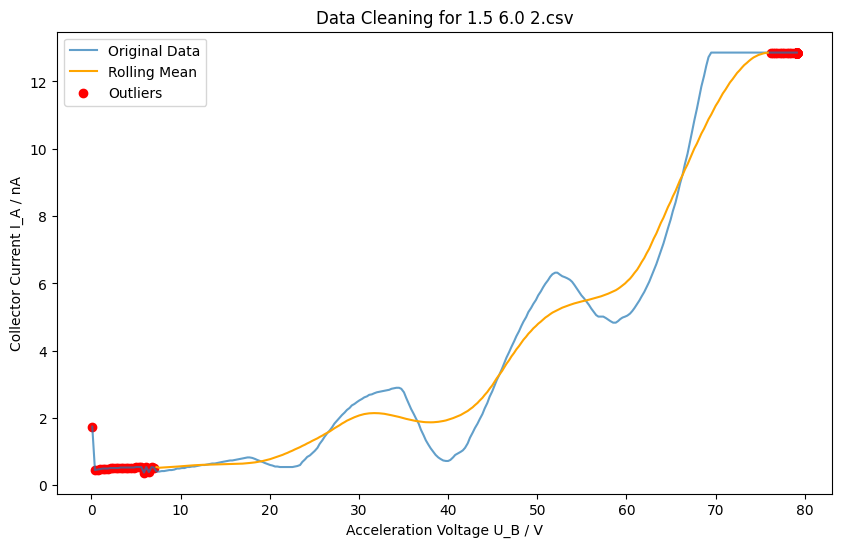

Processed file: 1.5 6.0 2.csv
Cleaned data saved to cleaned_data/1.5 6.0 2.csv
Data before filtering: 400 rows
Data after filtering: 251 rows


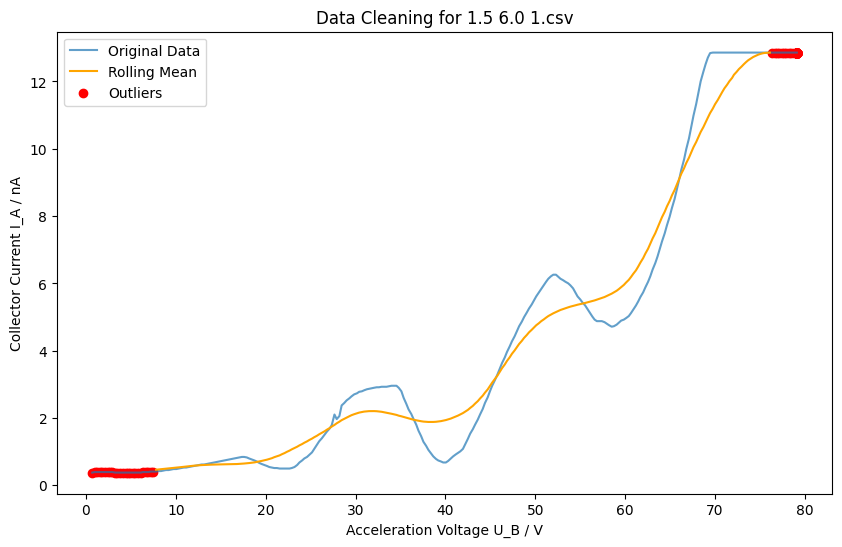

Processed file: 1.5 6.0 1.csv
Cleaned data saved to cleaned_data/1.5 6.0 1.csv
Data before filtering: 401 rows
Data after filtering: 352 rows


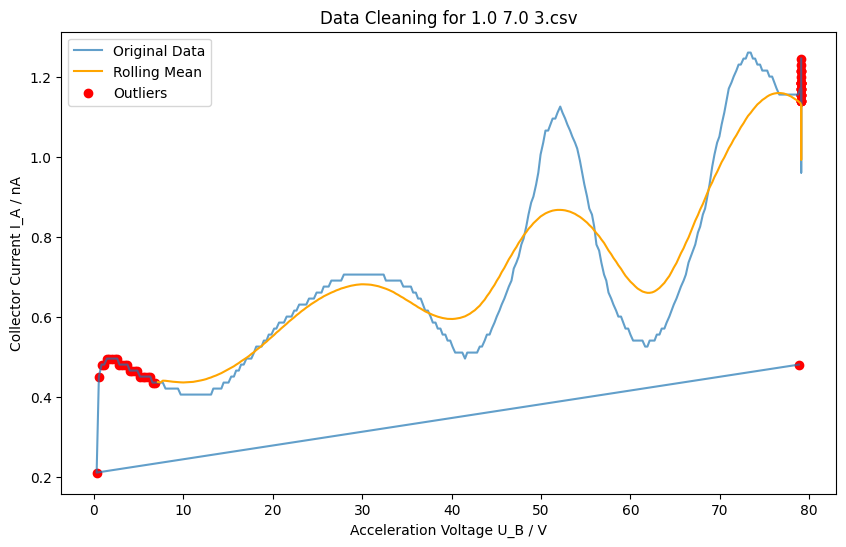

Processed file: 1.0 7.0 3.csv
Cleaned data saved to cleaned_data/1.0 7.0 3.csv
Data before filtering: 401 rows
Data after filtering: 352 rows


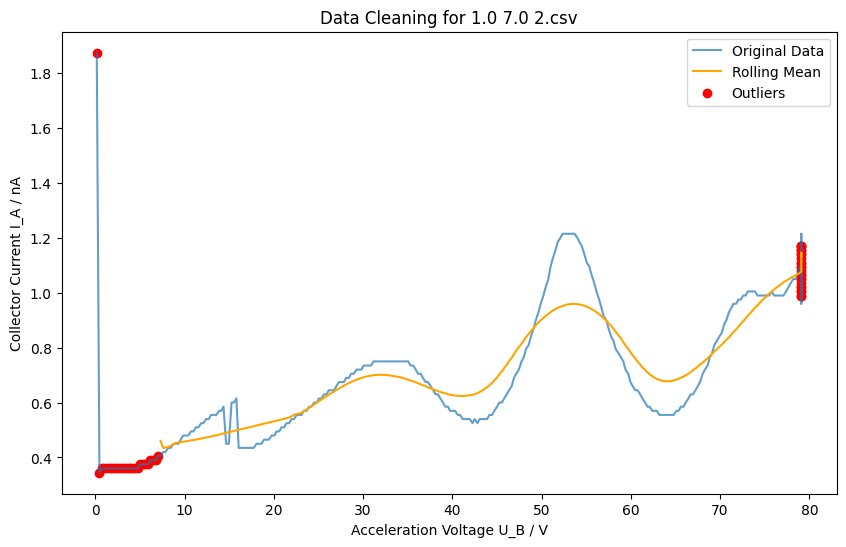

Processed file: 1.0 7.0 2.csv
Cleaned data saved to cleaned_data/1.0 7.0 2.csv
Data before filtering: 400 rows
Data after filtering: 351 rows


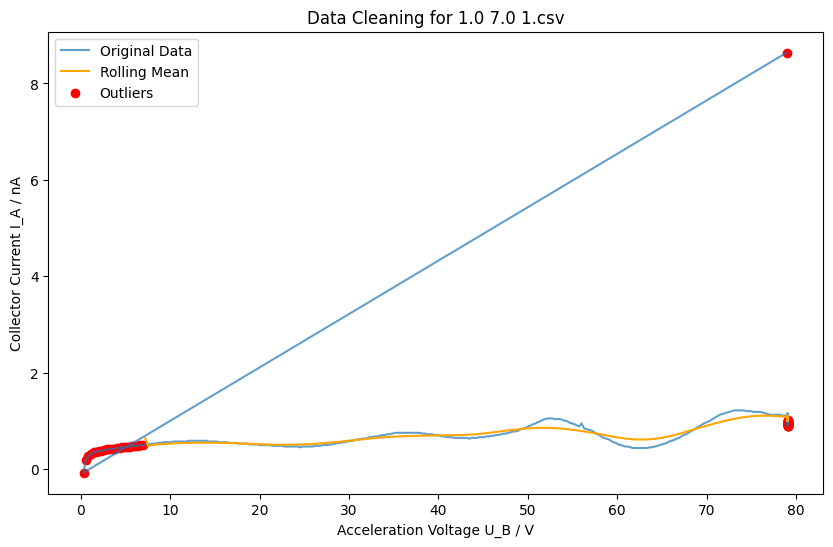

Processed file: 1.0 7.0 1.csv
Cleaned data saved to cleaned_data/1.0 7.0 1.csv
Data before filtering: 400 rows
Data after filtering: 242 rows


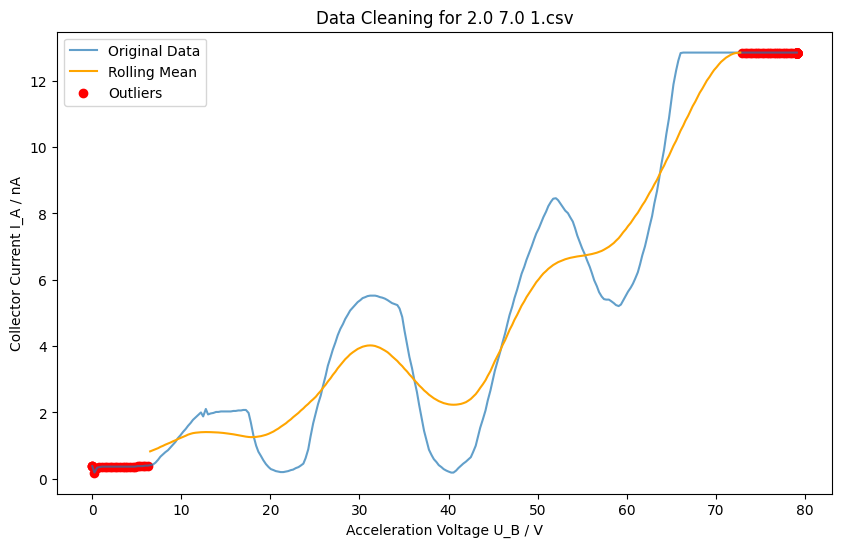

Processed file: 2.0 7.0 1.csv
Cleaned data saved to cleaned_data/2.0 7.0 1.csv
Data before filtering: 401 rows
Data after filtering: 352 rows


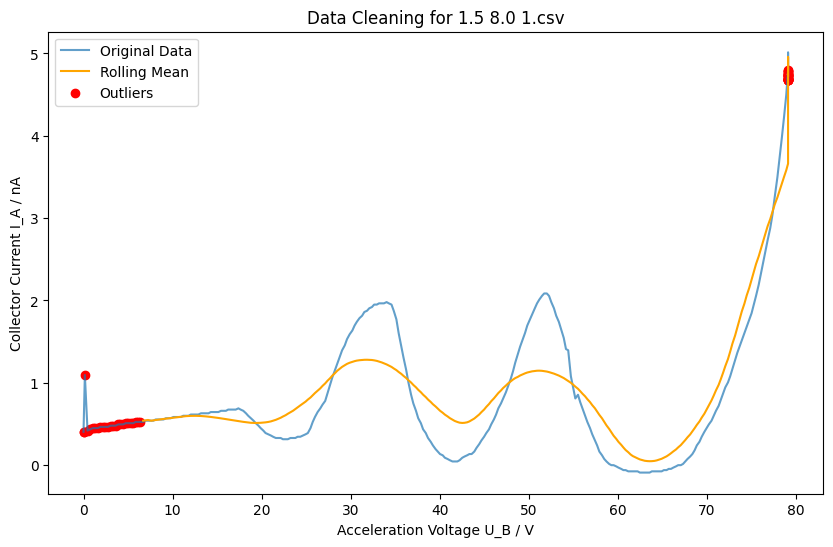

Processed file: 1.5 8.0 1.csv
Cleaned data saved to cleaned_data/1.5 8.0 1.csv
Data before filtering: 401 rows
Data after filtering: 352 rows


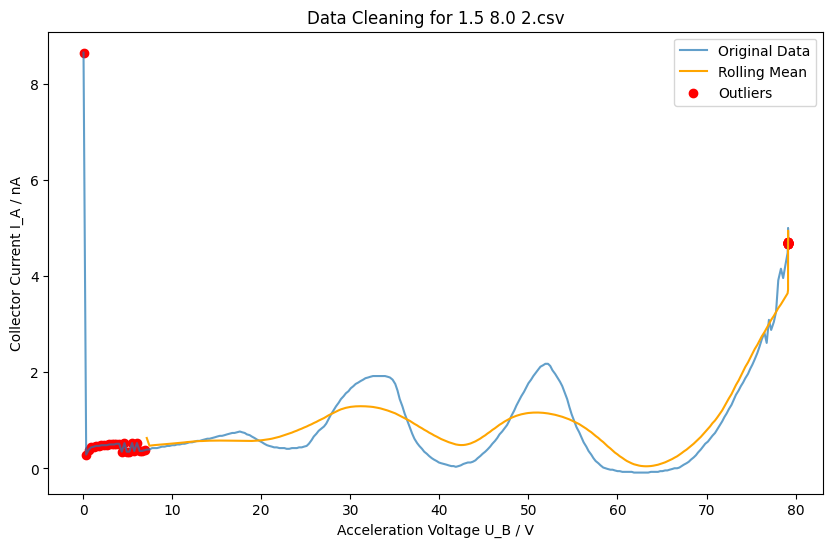

Processed file: 1.5 8.0 2.csv
Cleaned data saved to cleaned_data/1.5 8.0 2.csv
Data before filtering: 400 rows
Data after filtering: 240 rows


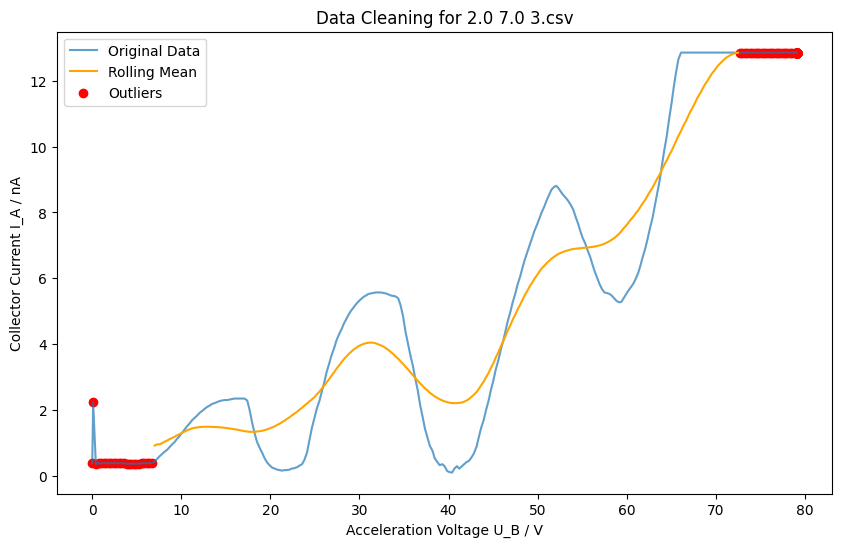

Processed file: 2.0 7.0 3.csv
Cleaned data saved to cleaned_data/2.0 7.0 3.csv
Data before filtering: 401 rows
Data after filtering: 252 rows


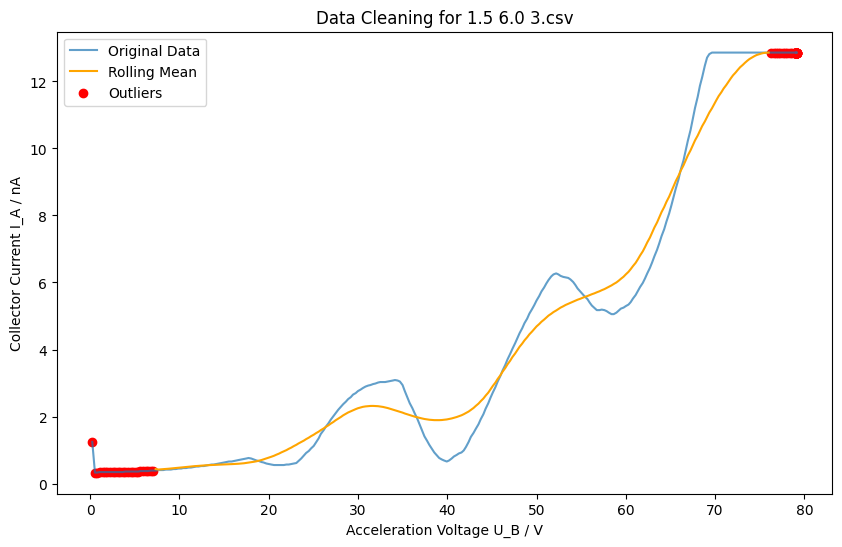

Processed file: 1.5 6.0 3.csv
Cleaned data saved to cleaned_data/1.5 6.0 3.csv
Data before filtering: 401 rows
Data after filtering: 239 rows


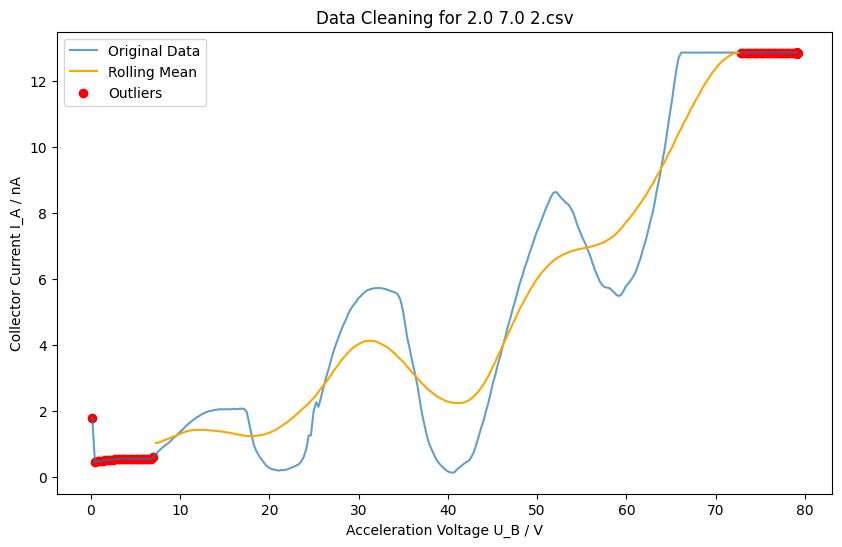

Processed file: 2.0 7.0 2.csv
Cleaned data saved to cleaned_data/2.0 7.0 2.csv
Data before filtering: 401 rows
Data after filtering: 352 rows


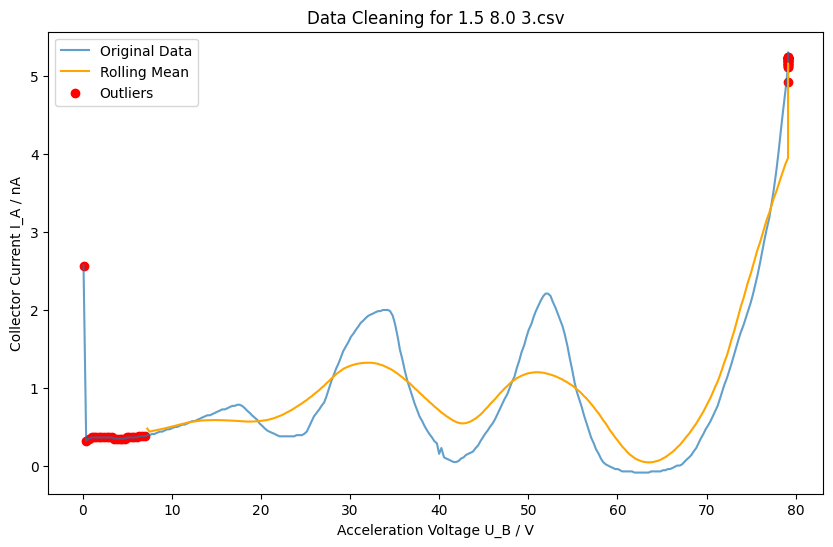

Processed file: 1.5 8.0 3.csv
Cleaned data saved to cleaned_data/1.5 8.0 3.csv
Data before filtering: 401 rows
Data after filtering: 352 rows


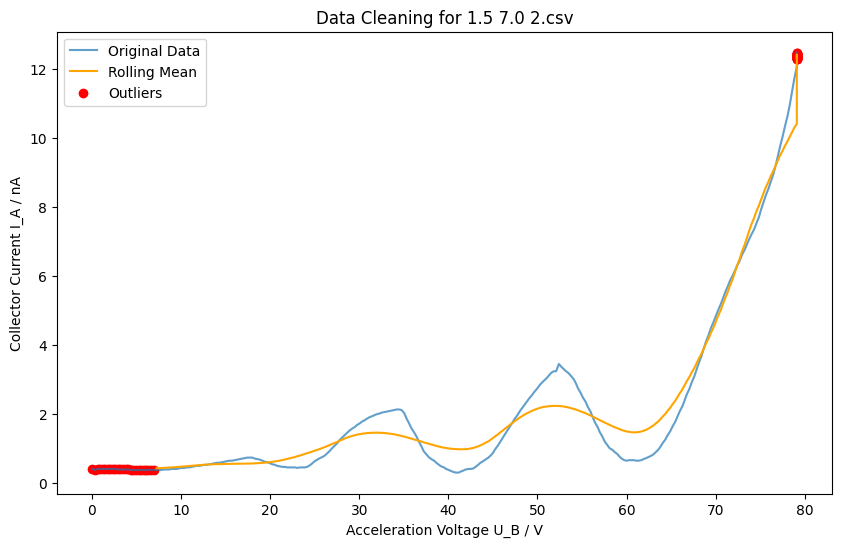

Processed file: 1.5 7.0 2.csv
Cleaned data saved to cleaned_data/1.5 7.0 2.csv
Data before filtering: 401 rows
Data after filtering: 352 rows


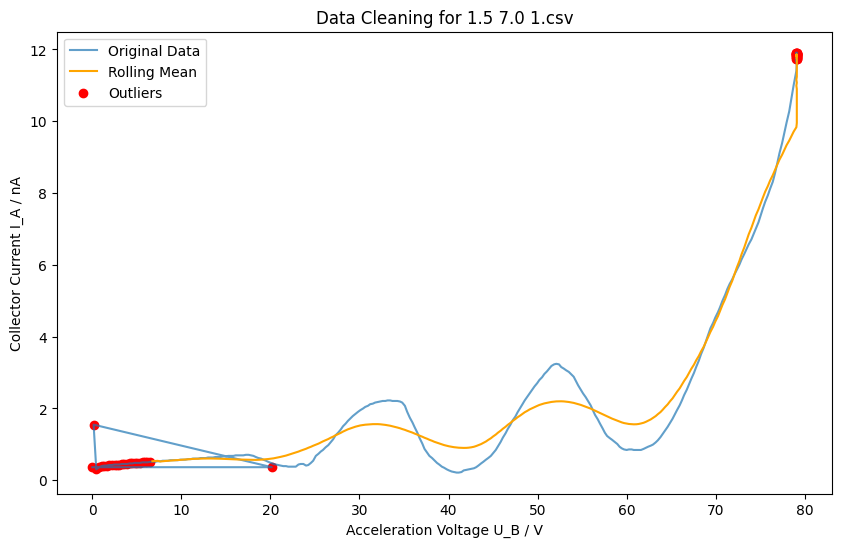

Processed file: 1.5 7.0 1.csv
Cleaned data saved to cleaned_data/1.5 7.0 1.csv
Data before filtering: 401 rows
Data after filtering: 352 rows


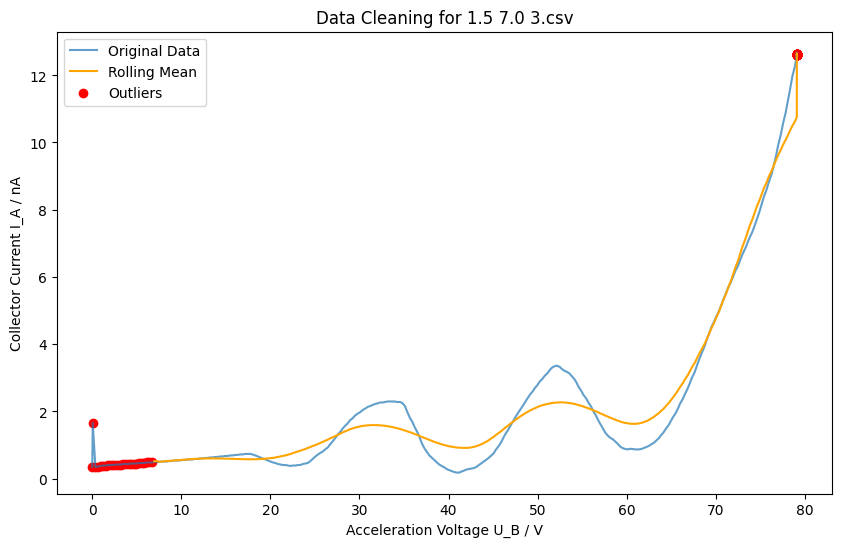

Processed file: 1.5 7.0 3.csv
Cleaned data saved to cleaned_data/1.5 7.0 3.csv
Data cleaning completed. Cleaned files are saved in the 'cleaned_data' folder.


In [4]:
# Function to clean data using rolling z-score
def clean_data_with_rolling_zscore(df, x_col, y_col, window, threshold):
    # Ensure the columns are numeric
    df[x_col] = pd.to_numeric(df[x_col], errors='coerce')
    df[y_col] = pd.to_numeric(df[y_col], errors='coerce')
    
    # Drop NaN values
    df = df.dropna(subset=[x_col, y_col])
    
    # Apply rolling z-score method to the y_col
    _, avg, _, mask = zscore(df[y_col], window=window, threshold=threshold, return_all=True)
    
    # Align the rolling average and mask with the data
    avg = avg[mask]  # Only keep rows that match the mask
    filtered_df = df[mask]  # Filter the data using the mask
    
    print(f"Data before filtering: {df.shape[0]} rows")
    print(f"Data after filtering: {filtered_df.shape[0]} rows")
    return filtered_df, avg

# Process each file in the folder
for file_name in os.listdir(input_directory):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_directory, file_name)

        # Read the CSV file with the correct delimiter
        df = pd.read_csv(file_path, delimiter=';')

        # Clean the data with rolling z-score
        cleaned_df, rolling_avg = clean_data_with_rolling_zscore(
            df, 
            x_col='Acceleration voltage U_B / V', 
            y_col='Collector current I_A / nA', 
            window=50, 
            threshold=3
        )
        
        # Plot the original data, rolling mean, and outliers
        plt.figure(figsize=(10, 6))
        # Original data
        plt.plot(
            df['Acceleration voltage U_B / V'], 
            df['Collector current I_A / nA'], 
            label="Original Data", alpha=0.7
        )
        # Rolling mean (aligned with cleaned data)
        plt.plot(
            cleaned_df['Acceleration voltage U_B / V'], 
            rolling_avg, 
            label="Rolling Mean", color='orange'
        )
        # Outliers
        outliers = df.loc[~df.index.isin(cleaned_df.index)]  # Exclude cleaned data
        plt.scatter(
            outliers['Acceleration voltage U_B / V'], 
            outliers['Collector current I_A / nA'], 
            color='red', label="Outliers"
        )
        plt.legend()
        plt.xlabel("Acceleration Voltage U_B / V")
        plt.ylabel("Collector Current I_A / nA")
        plt.title(f"Data Cleaning for {file_name}")
        plt.show()
        
        # Save the cleaned data
        cleaned_file_path = os.path.join(output_directory, file_name)
        cleaned_df.to_csv(cleaned_file_path, index=False)
        
        print(f"Processed file: {file_name}")
        print(f"Cleaned data saved to {cleaned_file_path}")

print("Data cleaning completed. Cleaned files are saved in the 'cleaned_data' folder.")
